#### INTRODUCTION

• Business Problem Framing

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. With the change in market due to covid 19 impact, used car sellers are facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data.

In [138]:
#Importing Necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler


#Model Creation :
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
# loading the dataset
df=pd.read_csv('car_price.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Brand,Model,Year,Fuel,KM driven,Price
0,0,0,Maruti,Alto,2013,Petrol,"74,922 km","₹2,05,899"
1,1,1,Ford,Figo,2017,Diesel,"55,089 km","₹4,68,299"
2,2,2,Ford,Figo,2017,Diesel,"95,535 km","₹4,30,899"
3,3,3,Hyundai,Elite,2019,Petrol,"3,691 km","₹6,49,499"
4,4,4,Maruti,Swift,2015,Petrol,"26,749 km","₹4,60,299"


In [39]:
df.shape

(2032, 6)

In [40]:
df.dtypes

Brand         object
Model         object
Year           int64
Fuel          object
KM driven    float64
Price        float64
dtype: object

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Brand', 'Model', 'Year', 'Fuel',
       'KM driven', 'Price'],
      dtype='object')

In [4]:
# Following columns are of no use in the dataset as it is only the count of total dataset
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head()

,Brand,Model,Year,Fuel,KM driven,Price
0,Maruti,Alto,2013,Petrol,"74,922 km","₹2,05,899"
1,Ford,Figo,2017,Diesel,"55,089 km","₹4,68,299"
2,Ford,Figo,2017,Diesel,"95,535 km","₹4,30,899"
3,Hyundai,Elite,2019,Petrol,"3,691 km","₹6,49,499"
4,Maruti,Swift,2015,Petrol,"26,749 km","₹4,60,299"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      2032 non-null   object
 1   Model      2032 non-null   object
 2   Year       2032 non-null   int64 
 3   Fuel       2032 non-null   object
 4   KM driven  2032 non-null   object
 5   Price      2032 non-null   object
dtypes: int64(1), object(5)
memory usage: 95.4+ KB


In [7]:
df.isnull().sum()

Brand        0
Model        0
Year         0
Fuel         0
KM driven    0
Price        0
dtype: int64

There is no missing values in the dataset

In [8]:
df['Brand'].unique()

array(['Maruti', 'Ford', 'Hyundai', 'Honda', 'Renault', 'Volkswagen',
       'KIA', 'Tata', 'Jeep', 'Audi', 'Toyota', 'Skoda', 'MG', 'Mahindra'],
      dtype=object)

In [9]:
# Count of each data present
df['Brand'].value_counts()

Maruti        1248
Hyundai        408
Ford           144
Honda           80
Renault         40
Volkswagen      32
Toyota          16
MG              16
Audi             8
Mahindra         8
KIA              8
Tata             8
Jeep             8
Skoda            8
Name: Brand, dtype: int64

In [11]:
# Looking for the duplicate values
df['Model'].unique()

array(['Alto', 'Figo', 'Elite', 'Swift', 'S', 'Ecosport', 'VENUE',
       'Ertiga', 'OMNI', 'New', 'BR-V', 'Dzire', 'Kwid', 'Vento', 'Creta',
       'Civic', 'SELTOS', 'Baleno', 'Vitara', 'Tiago', 'Ciaz', 'Wagon',
       'Eeco', 'Compass', 'Grand', 'XL6', 'Brio', 'Celerio', 'AURA',
       'i10', 'City', 'Polo', 'IGNIS', 'A3', 'Eon', 'WR-V', 'Fortuner',
       'KAROQ', 'HECTOR', 'Verna', 'XUV', 'Xcent', 'Jazz', 'Innova'],
      dtype=object)

In [12]:
# Checked for the unique values in 
df['Fuel'].unique()

array(['Petrol', 'Diesel', 'Petrol + CNG'], dtype=object)

In [13]:
# Checked the values of the feature "Fuel"
df['Fuel'].value_counts()

Petrol          1288
Diesel           688
Petrol + CNG      56
Name: Fuel, dtype: int64

In [14]:
df['Price'].unique()

array(['₹2,05,899', '₹4,68,299', '₹4,30,899', '₹6,49,499', '₹4,60,299',
       '₹5,50,299', '₹6,10,799', '₹5,47,199', '₹7,91,999', '₹8,11,899',
       '₹7,34,499', '₹2,41,999', '₹7,94,899', '₹4,56,199', '₹5,48,099',
       '₹6,16,399', '₹6,28,399', '₹2,17,399', '₹6,02,199', '₹8,78,299',
       '₹3,11,499', '₹8,38,799', '₹9,24,999', '₹5,51,199', '₹12,72,799',
       '₹8,00,499', '₹6,19,899', '₹7,66,199', '₹7,60,799', '₹12,73,599',
       '₹6,14,199', '₹14,27,999', '₹7,34,999', '₹16,44,599', '₹7,30,999',
       '₹5,29,499', '₹7,10,799', '₹8,18,399', '₹4,59,599', '₹7,55,899',
       '₹5,26,399', '₹7,12,399', '₹7,69,399', '₹8,60,099', '₹5,29,099',
       '₹6,40,999', '₹7,75,999', '₹6,23,999', '₹4,28,199', '₹7,82,999',
       '₹3,84,699', '₹9,63,099', '₹2,90,499', '₹7,42,199', '₹4,74,499',
       '₹14,18,499', '₹5,42,199', '₹6,70,699', '₹6,35,299', '₹9,80,199',
       '₹6,37,499', '₹8,01,399', '₹4,00,999', '₹5,78,499', '₹6,52,399',
       '₹9,58,599', '₹5,79,299', '₹10,34,799', '₹8,88,599',

In [15]:
# The price symbol and the comma in between amount is removed.
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('₹', '')

In [16]:
# The data type is changed from object type to float type.
df['Price'] = df['Price'].astype('float')

In [17]:
# Removed the string element from the data. km/kms and comma(,) is replaced with space.
df['KM driven']=df['KM driven'].str.replace(',','')
df['KM driven']=df['KM driven'].str.replace('[kms]','')

In [18]:
# The data type is changed from object type to float type.
df['KM driven']=df['KM driven'].astype('float')

In [19]:
df.head(10)

,Brand,Model,Year,Fuel,KM driven,Price
0,Maruti,Alto,2013,Petrol,74922.0,205899.0
1,Ford,Figo,2017,Diesel,55089.0,468299.0
2,Ford,Figo,2017,Diesel,95535.0,430899.0
3,Hyundai,Elite,2019,Petrol,3691.0,649499.0
4,Maruti,Swift,2015,Petrol,26749.0,460299.0
5,Maruti,S,2015,Diesel,163159.0,550299.0
6,Ford,Ecosport,2016,Diesel,65668.0,610799.0
7,Maruti,Swift,2020,Petrol,6789.0,547199.0
8,Hyundai,VENUE,2020,Petrol,4689.0,791999.0
9,Hyundai,VENUE,2020,Petrol,1420.0,811899.0


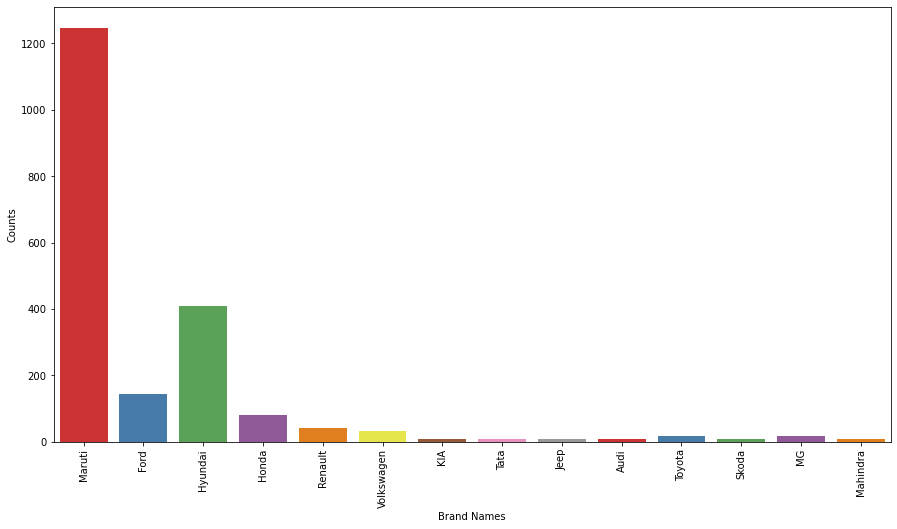

Maruti        1248
Hyundai        408
Ford           144
Honda           80
Renault         40
Volkswagen      32
Toyota          16
MG              16
Audi             8
Mahindra         8
KIA              8
Tata             8
Jeep             8
Skoda            8
Name: Brand, dtype: int64


In [29]:
plt.figure(figsize=(15,8))
sns.countplot(x='Brand',data=df,palette='Set1')
plt.xlabel("Brand Names")
plt.xticks(rotation='90')
plt.ylabel("Counts")
plt.show()

print(df['Brand'].value_counts())

Maruti cars are more for sell compare to other brands.

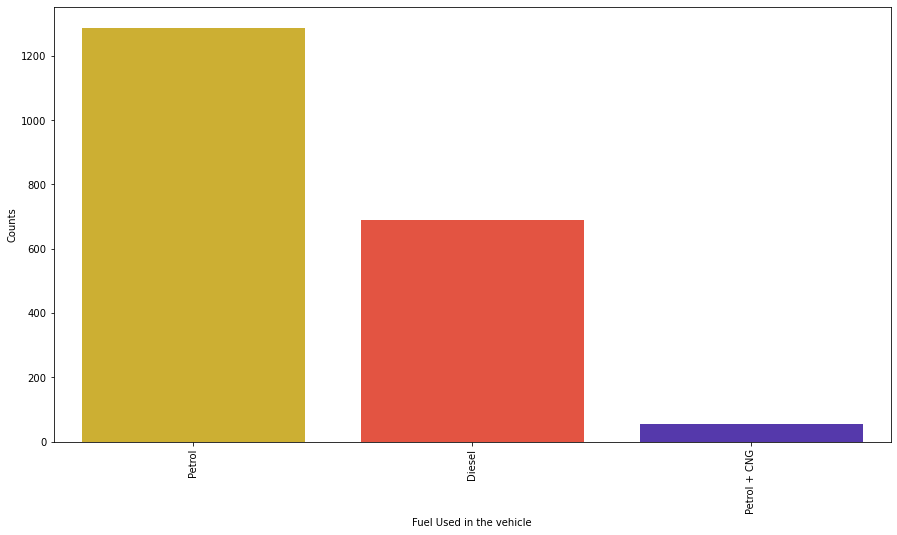

Petrol          1288
Diesel           688
Petrol + CNG      56
Name: Fuel, dtype: int64


In [30]:
plt.figure(figsize=(15,8))
sns.countplot(x='Fuel',data=df,palette='CMRmap_r')
plt.xlabel("Fuel Used in the vehicle")
plt.xticks(rotation='90')
plt.ylabel("Counts")
plt.show()

print(df['Fuel'].value_counts())

Most of the vehicle for sell, runs on petrol.

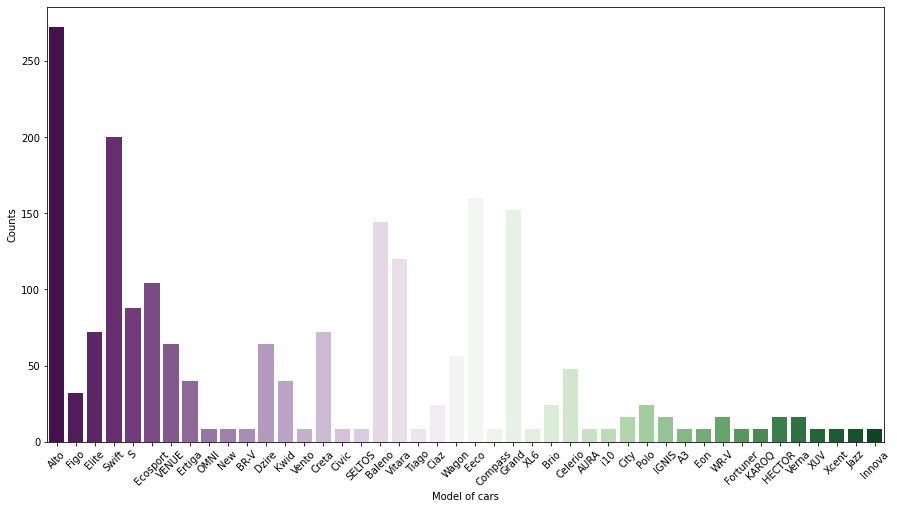

Alto        272
Swift       200
Eeco        160
Grand       152
Baleno      144
Vitara      120
Ecosport    104
S            88
Creta        72
Elite        72
Dzire        64
VENUE        64
Wagon        56
Celerio      48
Kwid         40
Ertiga       40
Figo         32
Ciaz         24
Polo         24
Brio         24
WR-V         16
City         16
HECTOR       16
Verna        16
IGNIS        16
Eon           8
Compass       8
i10           8
Fortuner      8
Vento         8
New           8
KAROQ         8
XL6           8
Xcent         8
Jazz          8
AURA          8
Innova        8
OMNI          8
Tiago         8
A3            8
Civic         8
XUV           8
BR-V          8
SELTOS        8
Name: Model, dtype: int64


In [35]:
plt.figure(figsize=(15,8))
sns.countplot(x='Model',data=df,palette='PRGn')
plt.xlabel("Model of cars")
plt.xticks(rotation='45')
plt.ylabel("Counts")
plt.show()

print(df['Model'].value_counts())

Top 2 car on sell are Swift, Alto. All these cars belong to the Maruti brand. We can assume that Maruti cars are more on sell compare to other brands and models

In [42]:
dummy=pd.get_dummies(df['Fuel'],drop_first=True)
df.drop('Fuel',axis=1,inplace=True)
df=pd.concat([df,dummy],axis=1)

In [43]:
dummy2=pd.get_dummies(df['Model'],drop_first=True)
df.drop('Model',axis=1,inplace=True)
df=pd.concat([df,dummy2],axis=1)

In [44]:
dummy3=pd.get_dummies(df['Brand'],drop_first=True)
df.drop('Brand',axis=1,inplace=True)
df=pd.concat([df,dummy3],axis=1)

Categorical values were converted into dummy variable and replaced the original one.

In [45]:
from datetime import date
today=date.today()

duration= today.year - df['Year']

Duration of the Car been registered and used are been calculated and used as a feature in the dataset

In [46]:
df.drop('Year',axis=1)

,KM driven,Price,Petrol,Petrol + CNG,AURA,Alto,BR-V,Baleno,Brio,Celerio,...,Jeep,KIA,MG,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen
0,74922.0,205899.0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,55089.0,468299.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95535.0,430899.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3691.0,649499.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26749.0,460299.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,39672.0,531999.0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2028,15292.0,608499.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2029,280921.0,719799.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2030,8648.0,571099.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


"Year" feature was dropped from the dataset. as we have created the duration of the car used with respect to current year.

In [47]:
df1=df.copy()

In [48]:
Duration=pd.DataFrame({"Duration":duration})
Duration

,Duration
0,8
1,4
2,4
3,2
4,6
...,...
2027,5
2028,3
2029,8
2030,3


In [49]:
df1=pd.concat([df1,Duration],axis=1)

In [50]:
df1.head()

,Year,KM driven,Price,Petrol,Petrol + CNG,AURA,Alto,BR-V,Baleno,Brio,...,KIA,MG,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,Duration
0,2013,74922.0,205899.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,8
1,2017,55089.0,468299.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2017,95535.0,430899.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,2019,3691.0,649499.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2015,26749.0,460299.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6


In [51]:
df1.drop('Year',axis=1,inplace=True)

In [52]:
df1.head()

,KM driven,Price,Petrol,Petrol + CNG,AURA,Alto,BR-V,Baleno,Brio,Celerio,...,KIA,MG,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,Duration
0,74922.0,205899.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,8
1,55089.0,468299.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,95535.0,430899.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,3691.0,649499.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,26749.0,460299.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6


In [53]:
df2=df1.copy()

In [54]:
df2.skew()

KM driven        1.708185
Price            2.345177
Petrol          -0.556129
Petrol + CNG     5.776098
AURA            15.854811
                  ...    
Skoda           15.854811
Tata            15.854811
Toyota          11.144113
Volkswagen       7.784951
Duration         0.792766
Length: 61, dtype: float64

Most of the features were skewed and need to be treated.

In [55]:
skewness=pd.DataFrame(df2.skew(),columns=['skew'])
skewness['Absolute_values']=skewness['skew'].abs()
skewness['Actual_skew']=skewness['Absolute_values'].apply(lambda x:True if x>=0.5 else False)
skewness

,skew,Absolute_values,Actual_skew
KM driven,1.708185,1.708185,True
Price,2.345177,2.345177,True
Petrol,-0.556129,0.556129,True
Petrol + CNG,5.776098,5.776098,True
AURA,15.854811,15.854811,True
...,...,...,...
Skoda,15.854811,15.854811,True
Tata,15.854811,15.854811,True
Toyota,11.144113,11.144113,True
Volkswagen,7.784951,7.784951,True


A data frame of skewed data were created along with the absolute value.

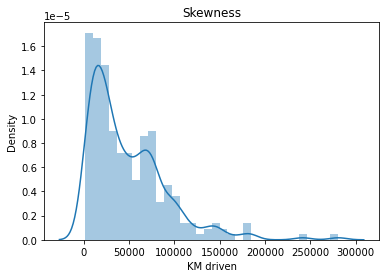

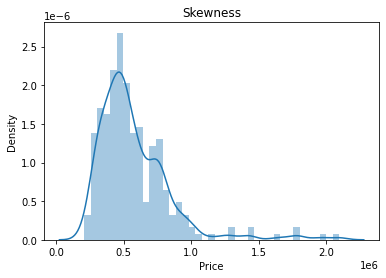

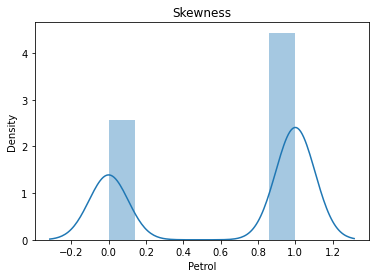

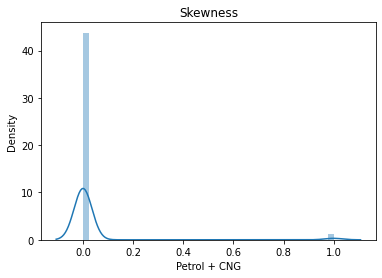

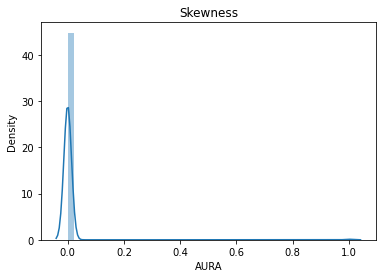

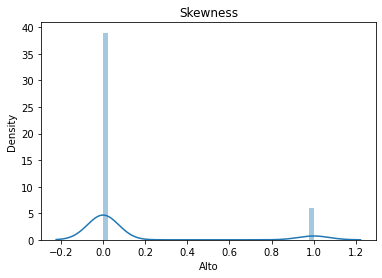

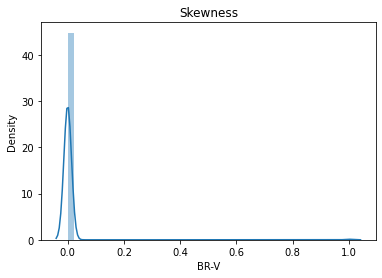

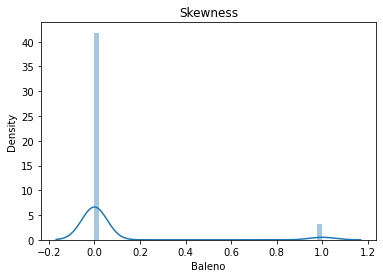

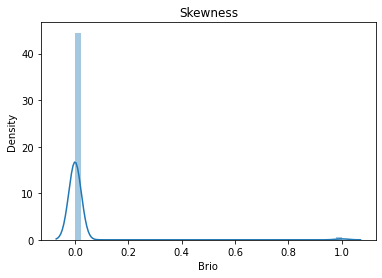

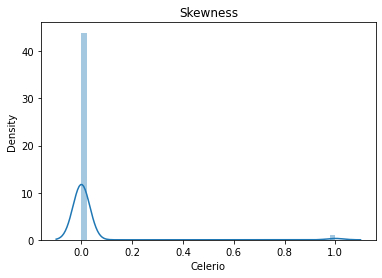

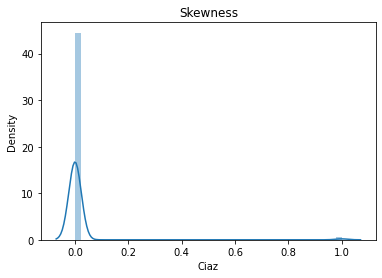

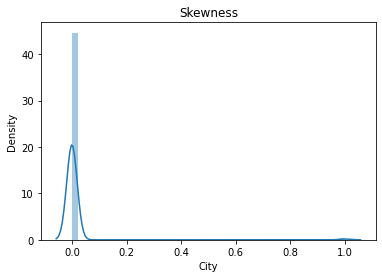

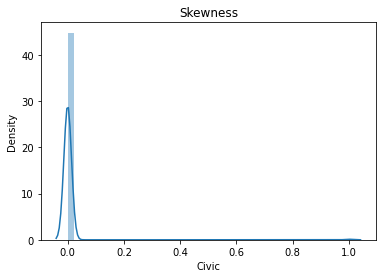

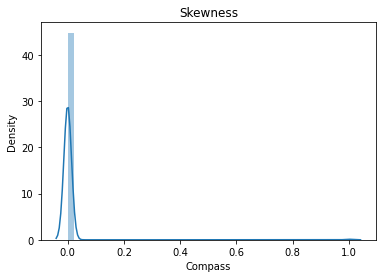

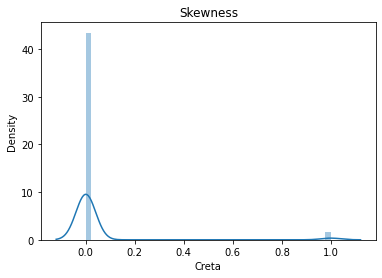

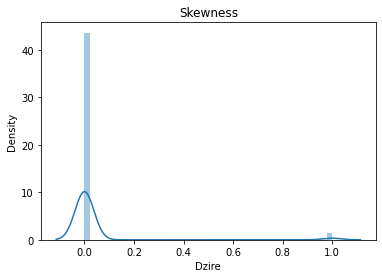

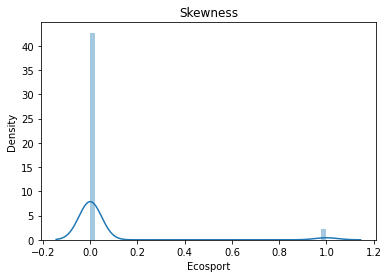

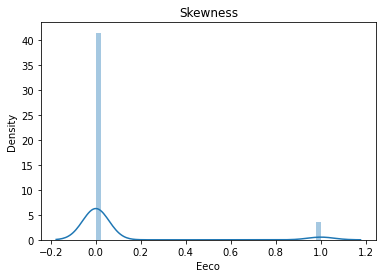

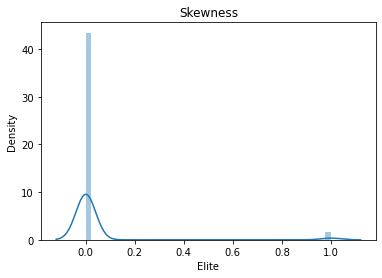

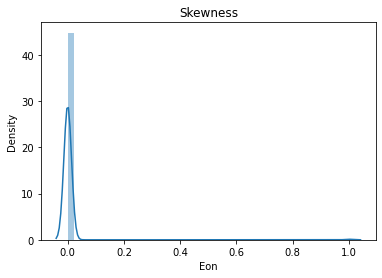

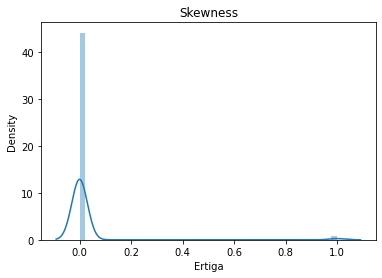

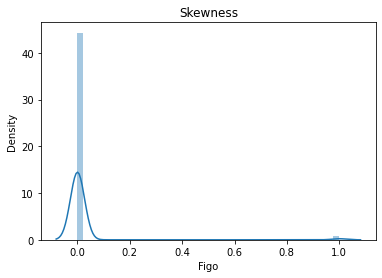

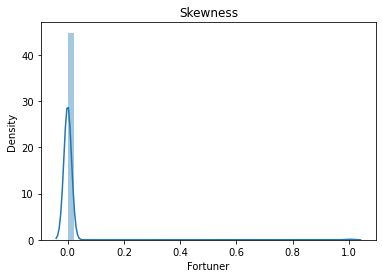

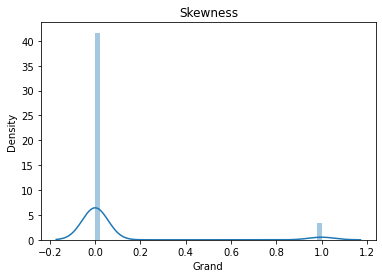

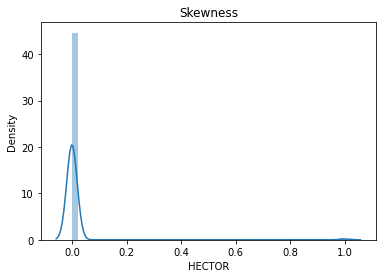

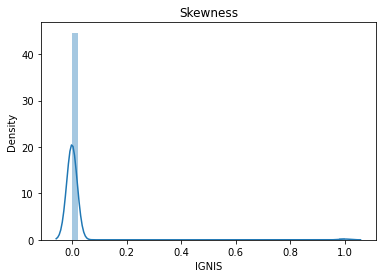

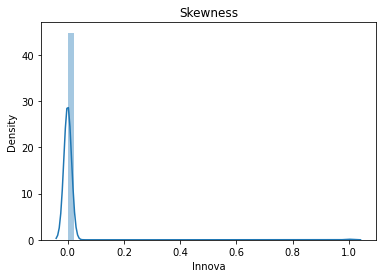

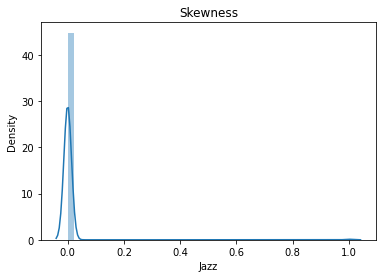

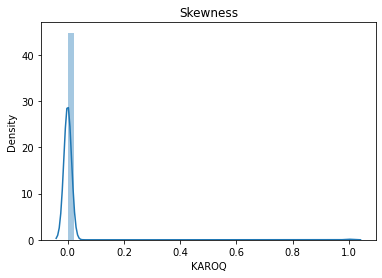

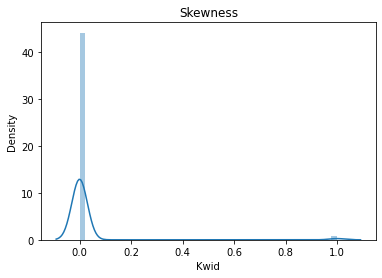

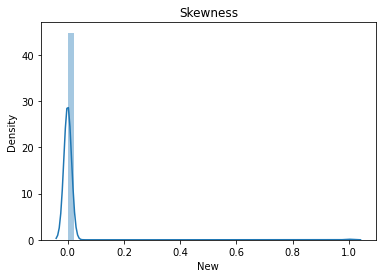

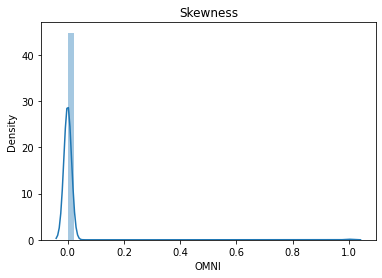

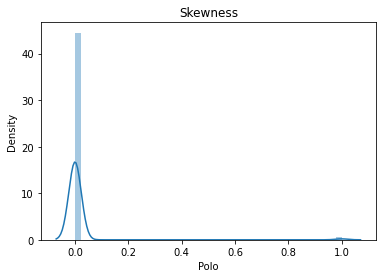

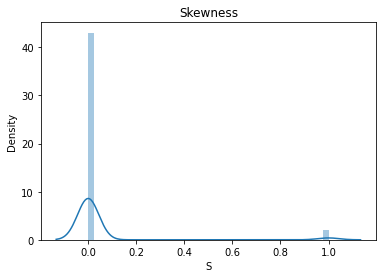

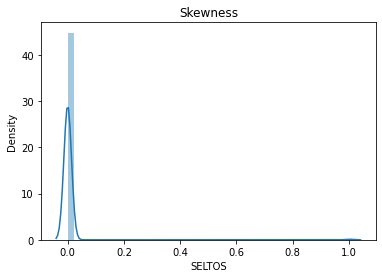

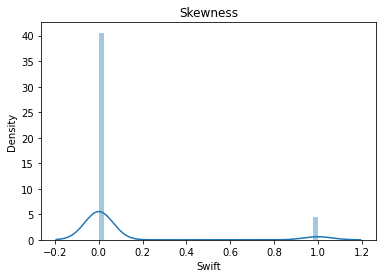

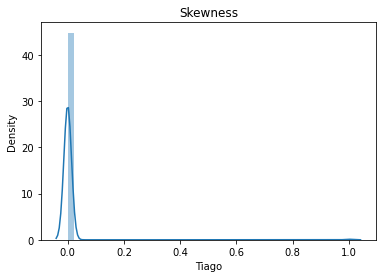

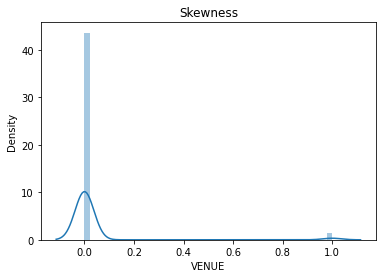

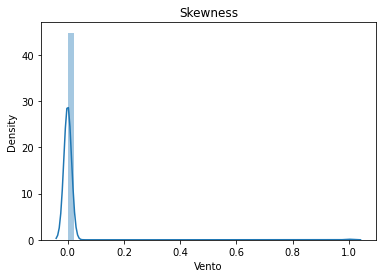

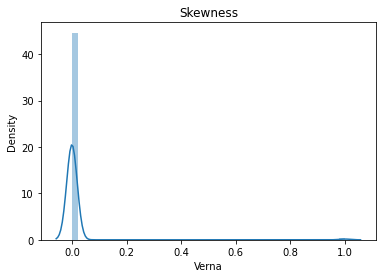

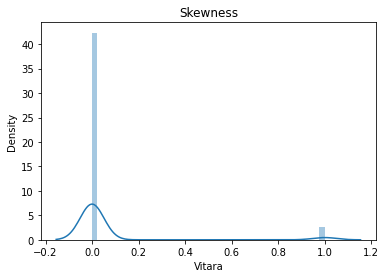

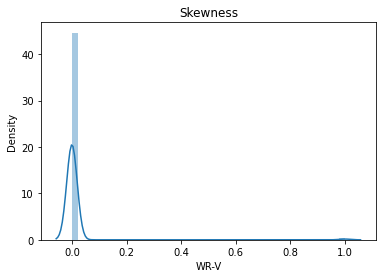

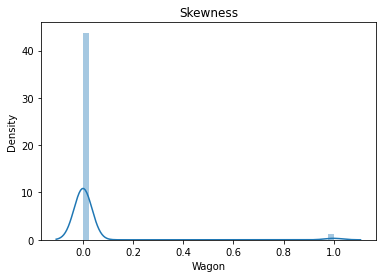

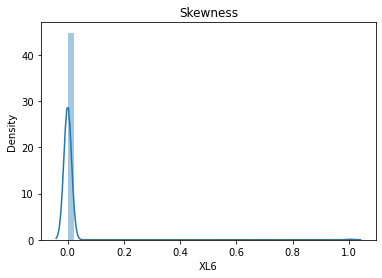

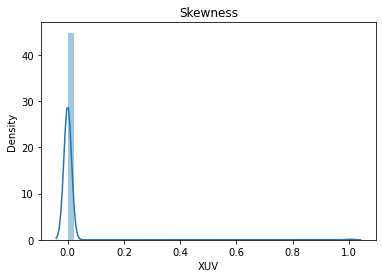

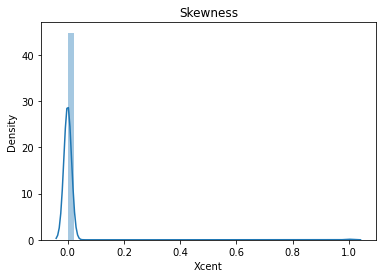

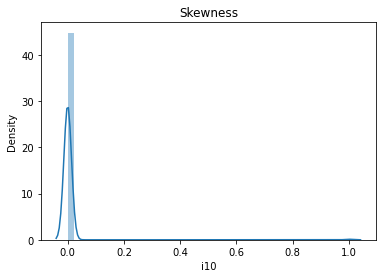

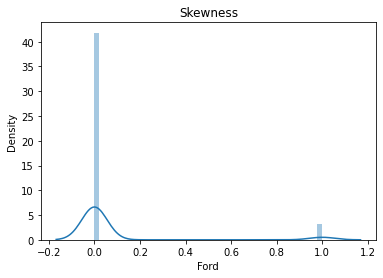

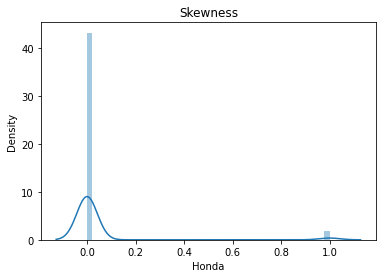

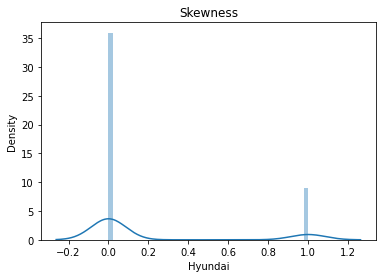

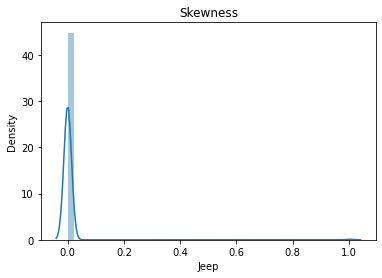

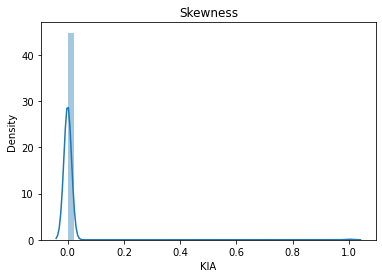

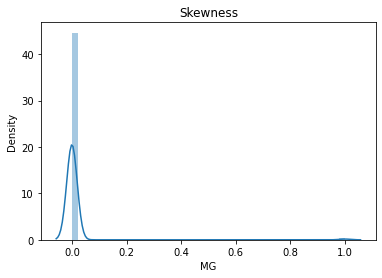

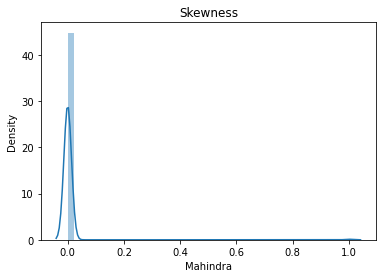

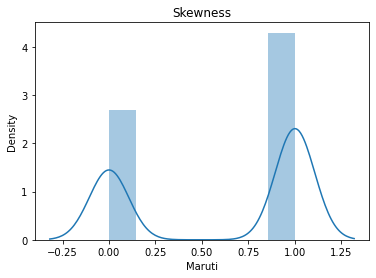

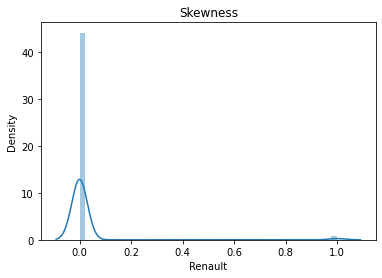

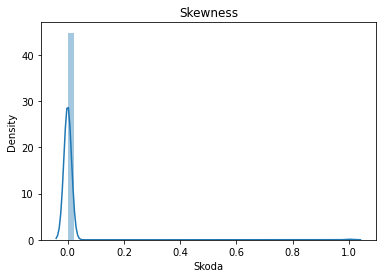

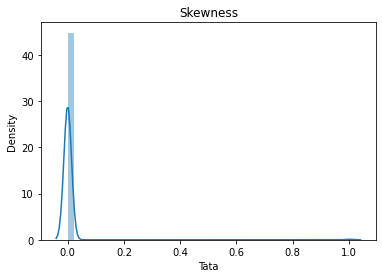

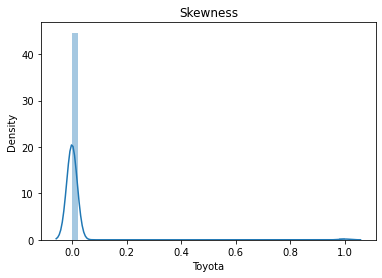

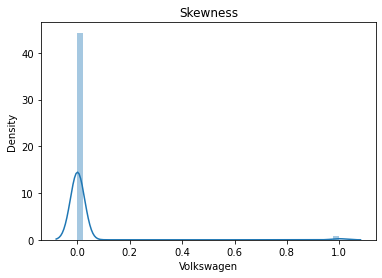

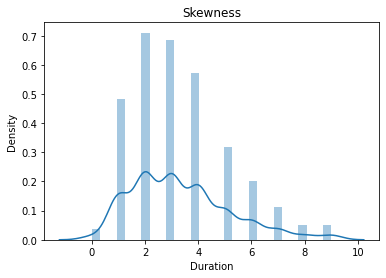

In [56]:
for column in df2.columns:
    sns.distplot(df2[column])
    plt.xlabel(column)
    plt.title("Skewness")
    plt.show()

Detecting the skewness in the features in the dataset

In [57]:
skewness.query('Actual_skew ==True')['skew']

KM driven        1.708185
Price            2.345177
Petrol          -0.556129
Petrol + CNG     5.776098
AURA            15.854811
Alto             2.152201
BR-V            15.854811
Baleno           3.347226
Brio             9.044300
Celerio          6.278193
Ciaz             9.044300
City            11.144113
Civic           15.854811
Compass         15.854811
Creta            5.029542
Dzire            5.368898
Ecosport         4.076387
Eeco             3.130485
Elite            5.029542
Eon             15.854811
Ertiga           6.920316
Figo             7.784951
Fortuner        15.854811
Grand            3.234922
HECTOR          11.144113
IGNIS           11.144113
Innova          15.854811
Jazz            15.854811
KAROQ           15.854811
Kwid             6.920316
New             15.854811
OMNI            15.854811
Polo             9.044300
S                4.490651
SELTOS          15.854811
Swift            2.698132
Tiago           15.854811
VENUE            5.368898
Vento       

In [58]:
# Log transformation was done to treat the skewness in the dataset.
for columns in df2.columns:
    df2[columns]=np.log1p(df2[columns])

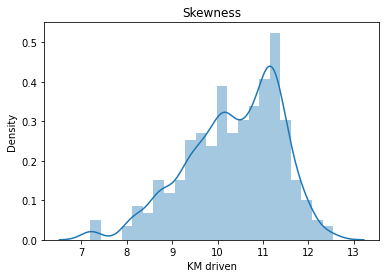

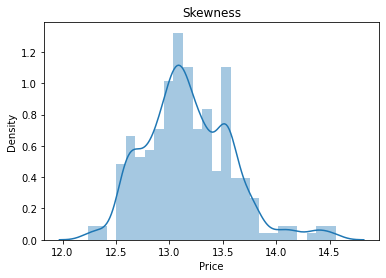

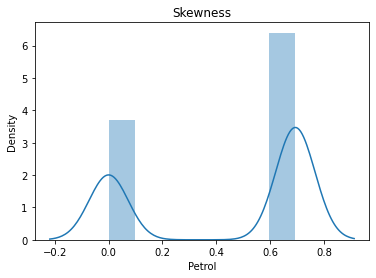

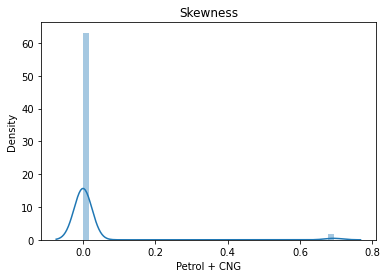

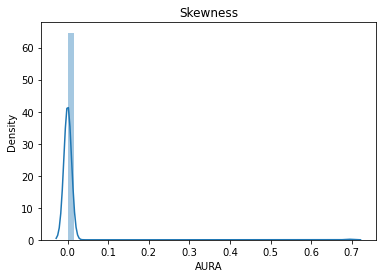

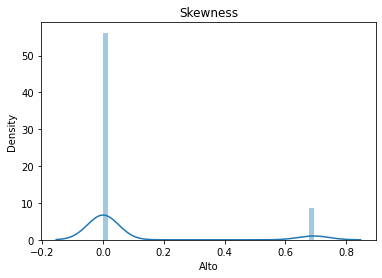

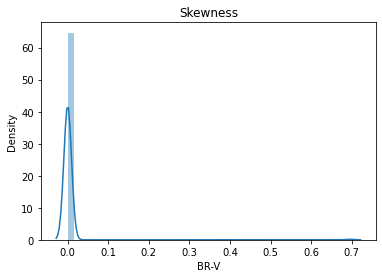

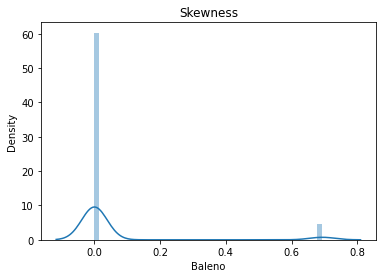

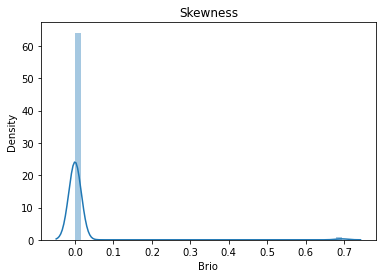

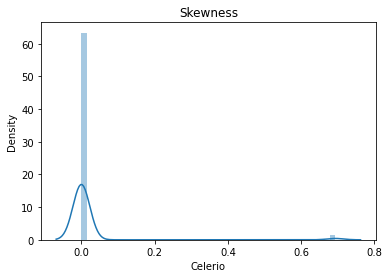

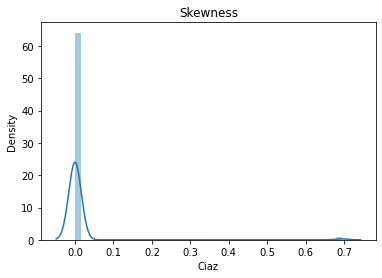

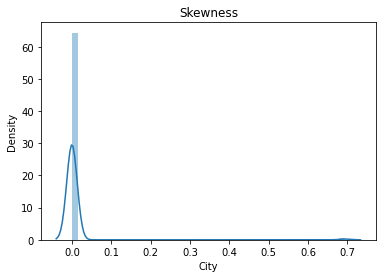

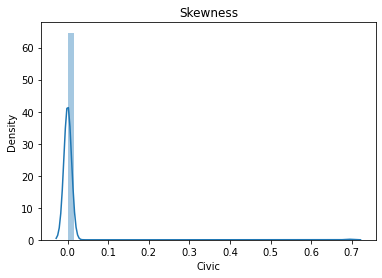

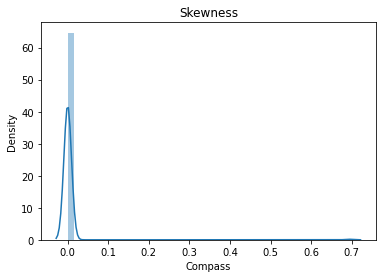

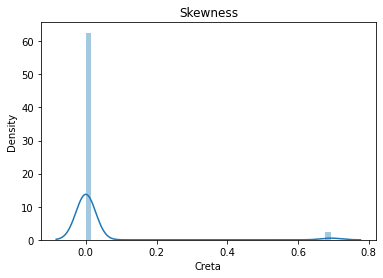

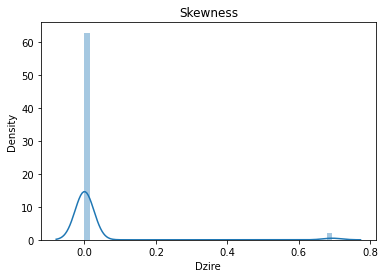

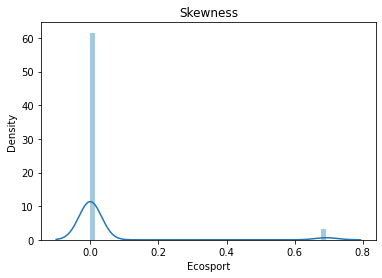

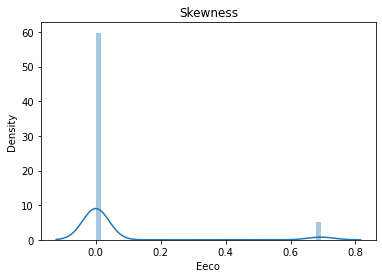

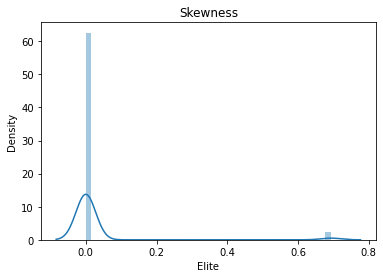

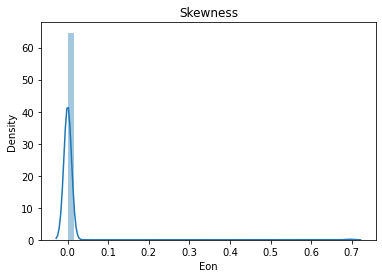

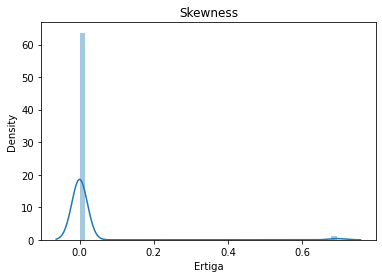

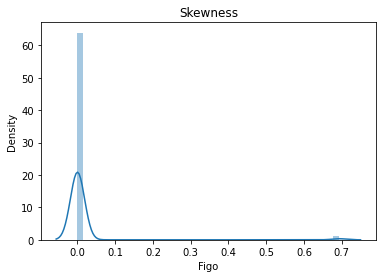

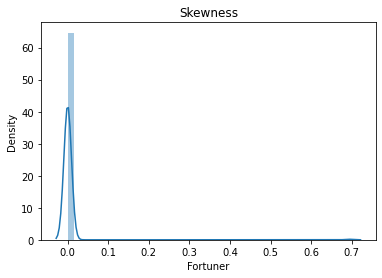

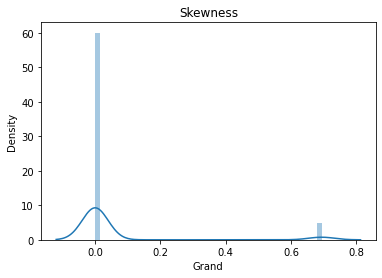

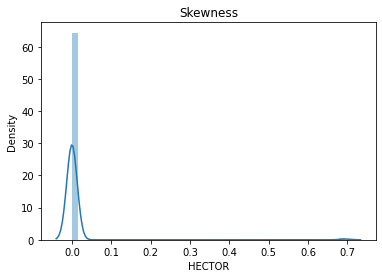

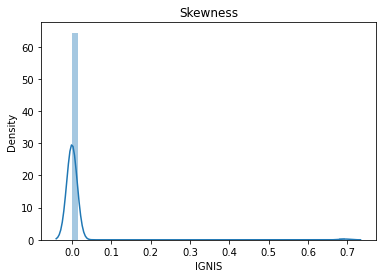

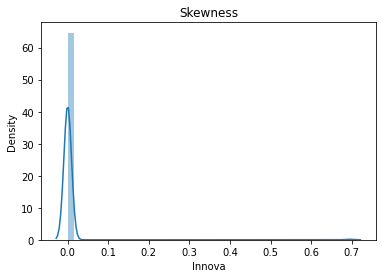

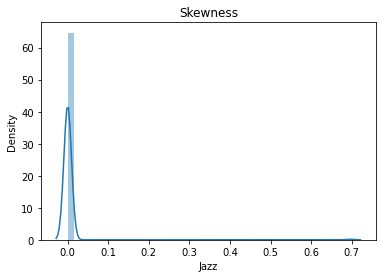

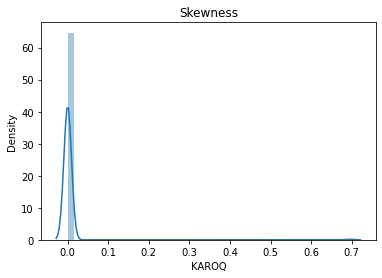

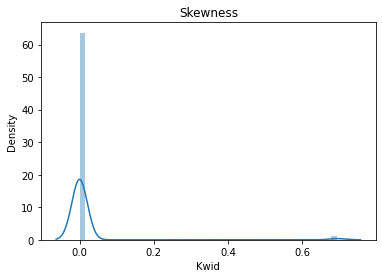

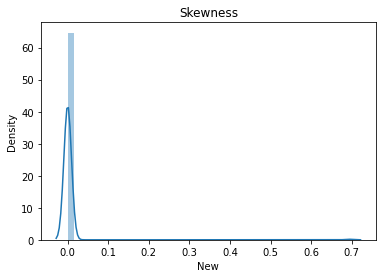

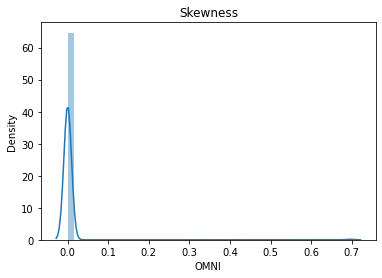

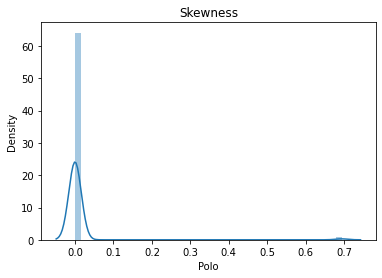

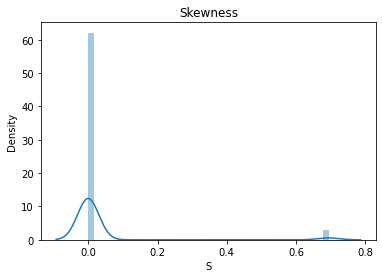

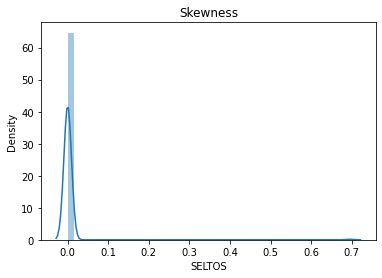

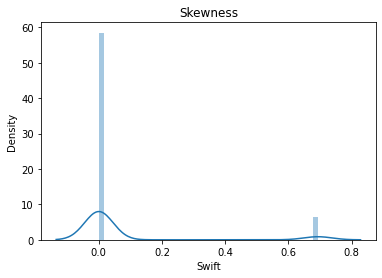

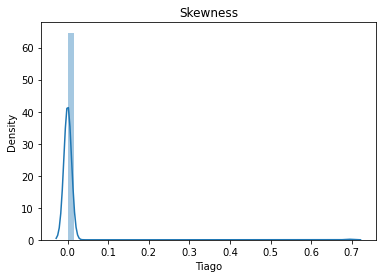

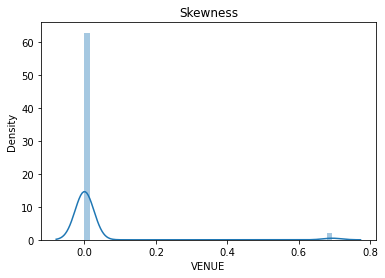

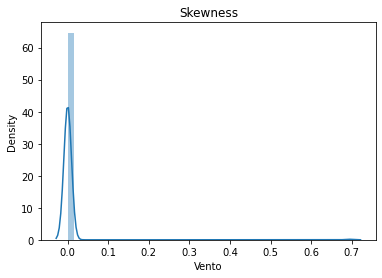

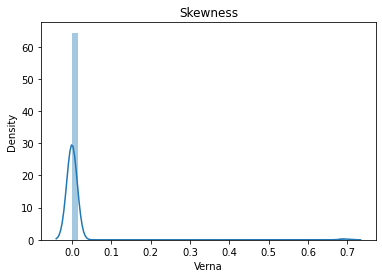

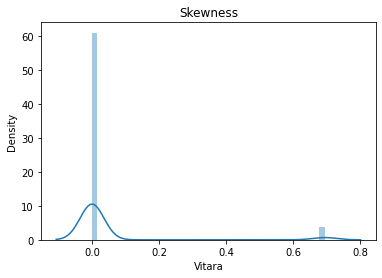

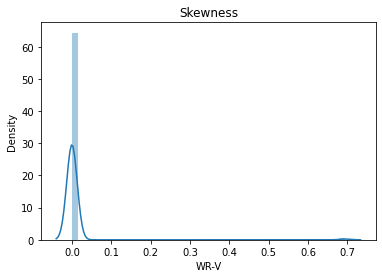

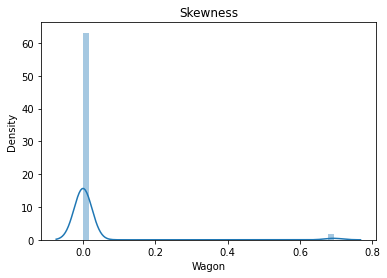

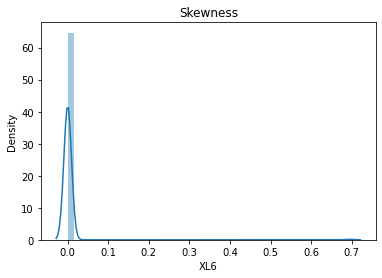

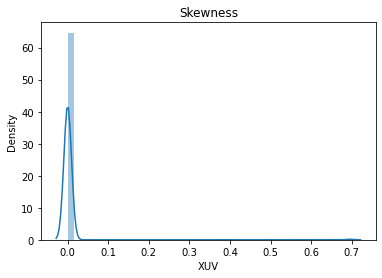

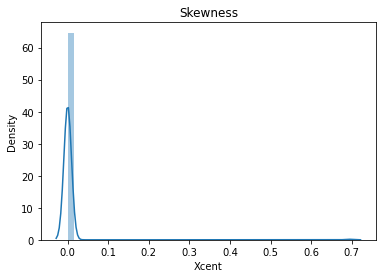

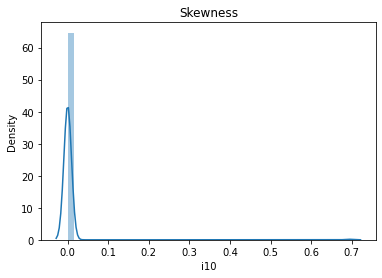

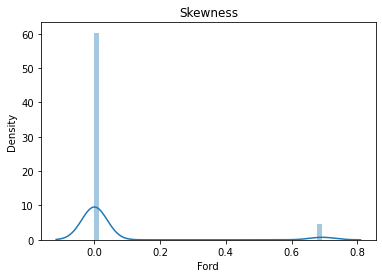

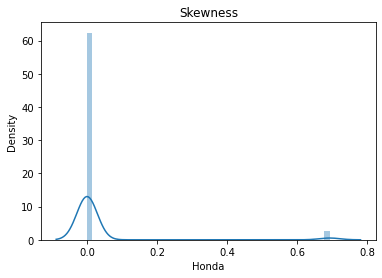

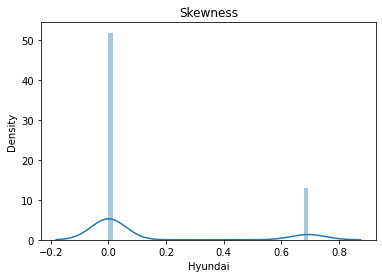

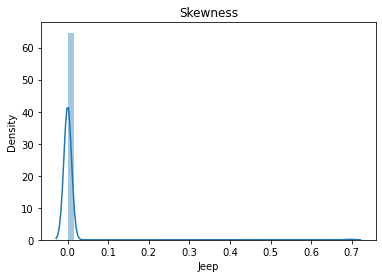

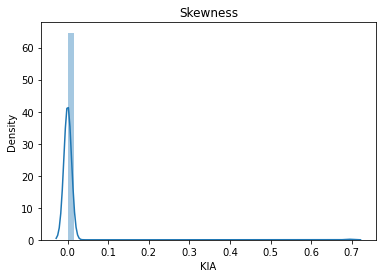

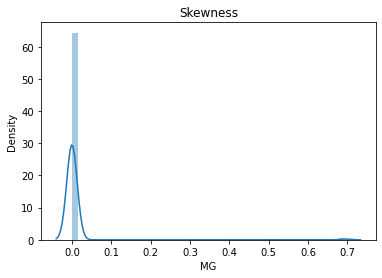

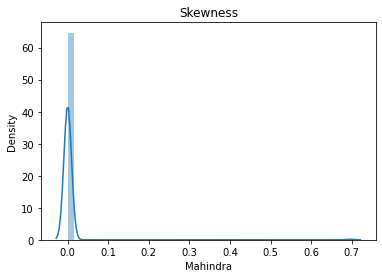

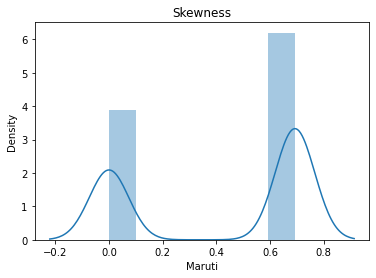

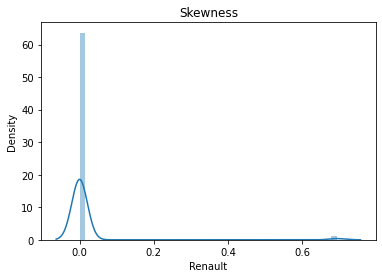

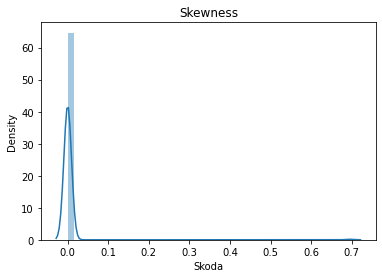

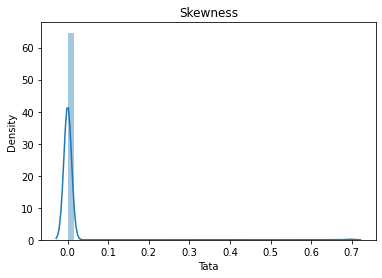

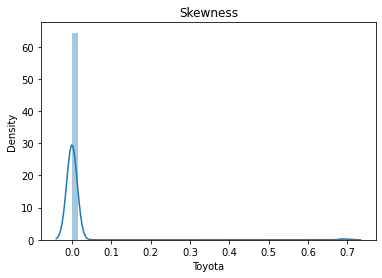

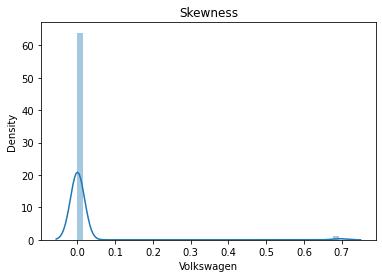

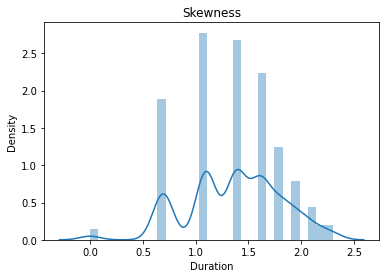

In [59]:
for column in df2.columns:

  sns.distplot(df2[column])
  plt.xlabel(column)
  plt.title("Skewness")
  plt.show()

After treating the skewed data by log transformation, the features were ploted.

In [60]:
df3=df2.copy()

In [61]:
# Dataset was divided x and y where x contain the independant features wereas y contain the dependant feature.
x= df3.drop('Price',axis=1)
y=df3['Price']

In [62]:
x

,KM driven,Petrol,Petrol + CNG,AURA,Alto,BR-V,Baleno,Brio,Celerio,Ciaz,...,KIA,MG,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,Duration
0,11.224216,0.693359,0.000000,0.0,0.693359,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.000000,0.000000,2.197225
1,10.916723,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.609438
2,11.467258,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.609438
3,8.213924,0.693359,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.098612
4,10.194290,0.693359,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.000000,0.000000,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,10.588426,0.693359,0.000000,0.0,0.000000,0.0,0.693359,0.0,0.0,0.0,...,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.000000,0.000000,1.791759
2028,9.635150,0.693359,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.693359,1.386294
2029,12.545832,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.693359,0.000000,2.197225
2030,9.065199,0.693359,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.000000,0.000000,1.386294


In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=pd.DataFrame(scaler.transform(x),index=x.index,columns=x.columns)

After all the transformation, the independant features were scaled using standard scaler.

In [64]:
x

,KM driven,Petrol,Petrol + CNG,AURA,Alto,BR-V,Baleno,Brio,Celerio,Ciaz,...,KIA,MG,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,Duration
0,0.834096,0.760026,-0.168345,-0.062869,2.543735,-0.062869,-0.276172,-0.109326,-0.155543,-0.109326,...,-0.062869,-0.089087,-0.062869,0.792594,-0.141705,-0.062869,-0.062869,-0.089087,-0.126491,1.861370
1,0.536663,-1.315744,-0.168345,-0.062869,-0.393123,-0.062869,-0.276172,-0.109326,-0.155543,-0.109326,...,-0.062869,-0.089087,-0.062869,-1.261680,-0.141705,-0.062869,-0.062869,-0.089087,-0.126491,0.539968
2,1.069186,-1.315744,-0.168345,-0.062869,-0.393123,-0.062869,-0.276172,-0.109326,-0.155543,-0.109326,...,-0.062869,-0.089087,-0.062869,-1.261680,-0.141705,-0.062869,-0.062869,-0.089087,-0.126491,0.539968
3,-2.077708,0.760026,-0.168345,-0.062869,-0.393123,-0.062869,-0.276172,-0.109326,-0.155543,-0.109326,...,-0.062869,-0.089087,-0.062869,-1.261680,-0.141705,-0.062869,-0.062869,-0.089087,-0.126491,-0.608418
4,-0.162134,0.760026,-0.168345,-0.062869,-0.393123,-0.062869,-0.276172,-0.109326,-0.155543,-0.109326,...,-0.062869,-0.089087,-0.062869,0.792594,-0.141705,-0.062869,-0.062869,-0.089087,-0.126491,1.296391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,0.219107,0.760026,-0.168345,-0.062869,-0.393123,-0.062869,3.620927,-0.109326,-0.155543,-0.109326,...,-0.062869,-0.089087,-0.062869,0.792594,-0.141705,-0.062869,-0.062869,-0.089087,-0.126491,0.949845
2028,-0.702980,0.760026,-0.168345,-0.062869,-0.393123,-0.062869,-0.276172,-0.109326,-0.155543,-0.109326,...,-0.062869,-0.089087,-0.062869,-1.261680,-0.141705,-0.062869,-0.062869,-0.089087,7.905694,0.038320
2029,2.112472,-1.315744,-0.168345,-0.062869,-0.393123,-0.062869,-0.276172,-0.109326,-0.155543,-0.109326,...,-0.062869,-0.089087,-0.062869,-1.261680,-0.141705,-0.062869,-0.062869,11.224972,-0.126491,1.861370
2030,-1.254284,0.760026,-0.168345,-0.062869,-0.393123,-0.062869,-0.276172,-0.109326,-0.155543,-0.109326,...,-0.062869,-0.089087,-0.062869,0.792594,-0.141705,-0.062869,-0.062869,-0.089087,-0.126491,0.038320


- ##### Hold Out Method:

Model will be built on Hold Out method (75/25 training and test split) to gauge how well the Regressor is working.

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

- ### Model Creation:

Now we are going to build 6 different models. And let's check which one is giving us the best Accuray. Those models are:

1. LinearRegression
2. KNeiborsRegressor
3. SVR
4. RandomForestRegressor
5. Gradient Boosting Regressor
6. Ada-Boost Regressor

In [67]:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [69]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.9223651178811492


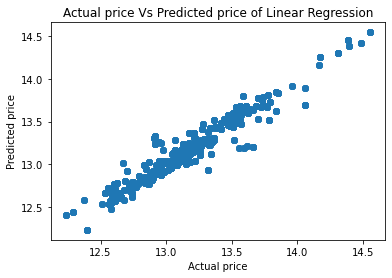

In [80]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Linear Regression')
plt.show()

In [71]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

In [72]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)
print('Accuracy of LR :',lr_accuracy*100)

R Square Score of Linear Regression: 0.9103808959332991
Accuracy of LR : 91.03808959332991


In [73]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  0.08276792056939444


In [74]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  0.01585249911260534


In [75]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  0.12590670797302794


In [76]:
#Model Training:

kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [77]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [78]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.9987256887312255


<function matplotlib.pyplot.show(close=None, block=None)>

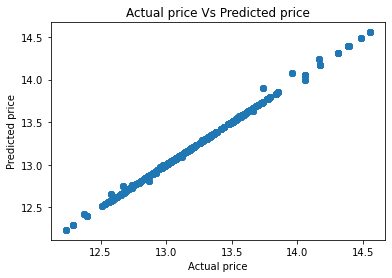

In [79]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price')
plt.show

In [81]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

In [82]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of KNN :',kn_accuracy*100)

R Square Score of K-Neighbors Regressor: 0.9965075870740794
Accuracy of KNN : 99.65075870740793


In [83]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  0.008175184993079692


In [84]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  0.0006177641852768738


In [85]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  0.024854862407120138


In [86]:
#Model Training:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [87]:
#Model Prediction with trained data:
y_svr_pred = svr.predict(x_train)

In [88]:
print("R Square Score of SVR:",metrics.r2_score(y_train,y_svr_pred))

R Square Score of SVR: 0.9591192933986843


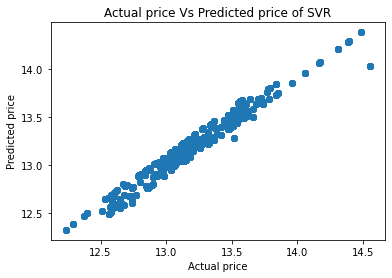

In [89]:
#Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_svr_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of SVR')
plt.show()

In [90]:
# Predicting test data with model:
y_test_svr_pred = svr.predict(x_test)

In [91]:
svr_accuracy = metrics.r2_score(y_test,y_test_svr_pred)
print("R Square Score of SVR:",svr_accuracy)
print('Accuracy of SVR :',svr_accuracy*100)

R Square Score of SVR: 0.9625204721815591
Accuracy of SVR : 96.25204721815591


In [92]:
print ('mean absolute error of SVR: ',mean_absolute_error(y_test,y_test_svr_pred))

mean absolute error of SVR:  0.06604970191228234


In [93]:
print ('mean squared error of SVR is: ',mean_squared_error(y_test,y_test_svr_pred))

mean squared error of SVR is:  0.006629659910910257


In [94]:
print ('Root mean squared error of SVR is: ',np.sqrt(mean_squared_error(y_test,y_test_svr_pred)))

Root mean squared error of SVR is:  0.08142272355374916


In [95]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [96]:
#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)

In [97]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.999968730639291


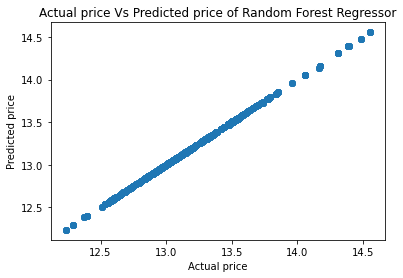

In [98]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Random Forest Regressor')
plt.show()

In [99]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

In [100]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.9999298734203137
Accuracy of RFR : 99.99298734203137


In [101]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))

mean absolute error of Random Forest Regressor:  0.0011926420720434225


In [102]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))

mean squared error of Random Forest Regressor is:  1.2404515240633958e-05


In [103]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

Root mean squared error of Random Forest Regressor is:  0.0035220044350673324


In [104]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [105]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

In [106]:
print("R Square Score of Gradient Boosting Regressor: ",metrics.r2_score(y_train,y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.8940490825575942


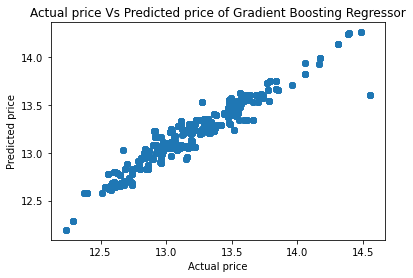

In [107]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Gradient Boosting Regressor')
plt.show()

In [108]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

In [109]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.8959409933367563
Accuracy of GBR : 89.59409933367563


In [110]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  0.09994919259581365


In [111]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  0.0184067373576946


In [112]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  0.13567143161953663


In [113]:
# Model Training:
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [114]:
#Model Prediction with trained data:
y_abr_pred = abr.predict(x_train)

In [115]:
print("R Square Score of Ada-Boost Regressor:",metrics.r2_score(y_train,y_abr_pred))

R Square Score of Ada-Boost Regressor: 0.5688647953019206


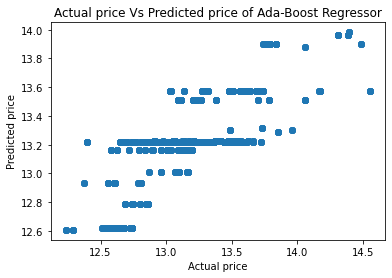

In [116]:
#Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_abr_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Ada-Boost Regressor')
plt.show()

In [117]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

In [118]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of Ada-Boost Regressor:",abr_accuracy)
print('Accuracy of ABR :',abr_accuracy*100)

R Square Score of Ada-Boost Regressor: 0.6033949314025501
Accuracy of ABR : 60.33949314025501


In [119]:
print ('mean absolute error of Ada-Boost Regressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of Ada-Boost Regressor:  0.20665065591621834


In [121]:
print ('mean squared error of Ada-Boost Regressor is: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of Ada-Boost Regressor is:  0.07015447837233994


In [122]:
print ('Root mean squared error of Ada-Boost Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of Ada-Boost Regressor is:  0.2648669069029575


#### Regularization:
When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting.
##### Regularization using Lasso:

In [123]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [124]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

5.169581475358533e-06

In [125]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=5.169581475358533e-06)

In [126]:
lasso_reg.score(x_test,y_test)

0.9145099109004654

#### Regularization Using Ridge:

In [127]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [128]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [129]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [130]:
ridge_model.score(x_test,y_test)

0.9145062887429525

Both Lasso and Ridge is giving score of 91%. So, there is no overfitting problem present as such. Let's check overfitting once again using Cross Validation also.

#### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [131]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean()*100)

[-6.61350207e+25  9.26468217e-01  9.13181708e-01  8.98205180e-01
  9.32782461e-01]
mean : -1.322700414326676e+27


In [132]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.95574155 0.91803111 0.77726917 0.93172709 0.93730791]
mean : 90.40153672666334


In [133]:
svr_cv_score = cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print(svr_cv_score)
print('mean :',svr_cv_score.mean()*100)

[0.93488242 0.86893756 0.95520859 0.95941131 0.94084023]
mean : 93.18560232200144


In [134]:
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('mean :',rf_cv_score.mean()*100)

[0.92801689 0.99791906 0.99922844 0.99654464 0.99954161]
mean : 98.4250127651999


In [135]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.86031618 0.81279771 0.86375176 0.89511055 0.88536434]
mean : 86.34681074737406


In [136]:
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean()*100)

[0.62320181 0.65516213 0.44800362 0.54153236 0.53974302]
mean : 56.15285887251158


#### Observation: 
As Random Forest Regresssor has given the best accuracy that's why we are going to use that model for hyper parameter tuning.

##### Hyperparameter Tuning:

 Now we will use Grid Search Technique to tune the hyperparameter of Gradient Boosting Regressor. After getting the best parameters we can put those into the model to obtain the best accuracy.

In [139]:
rfr = RandomForestRegressor()
params={'n_estimators':[x for x in range(10,100)],
        'criterion': ['mse','mae'],
       'max_features':['auto', 'sqrt','log2'],
       'max_depth':[x for x in range(1,20)],
       'min_samples_split':[0.1,1.0,10],
       'min_samples_leaf':[1,3,4]}

rnd_srch= RandomizedSearchCV(rfr,cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)
rnd_srch.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=13, max_features='log2',
                      min_samples_leaf=3, min_samples_split=10,
                      n_estimators=96)

In [140]:
rfr = RandomForestRegressor(max_depth=11,max_features='log2',min_samples_leaf=3, min_samples_split=10,
                          n_estimators=32) 
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [141]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
80.80641817722469


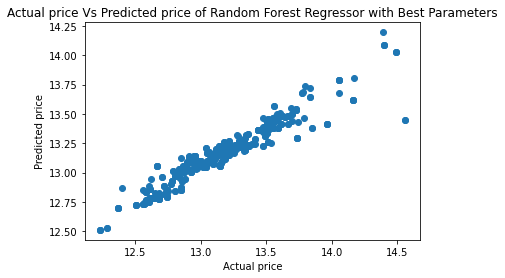

In [142]:
# Checking Actual Vs Predicted using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Random Forest Regressor with Best Parameters')
plt.show()

In [143]:
# model prediction using Linear Regression
x_predict = list(rfr.predict(x_test))
rf_car = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_car))

      predicted_values  orignal_values
1011         13.117048       13.184399
1664         12.790207       12.658103
1921         13.106463       13.061126
1578         13.092216       13.070017
552          13.191477       13.178933
...                ...             ...
1839         13.472022       13.594115
668          13.095300       12.932171
732          13.142925       12.958667
1498         14.196691       14.388917
1739         13.720987       13.834725

[508 rows x 2 columns]


In [144]:
#import joblib
import joblib

joblib.dump(rfr,'rf_car.obj')

# SAVING THE MODEL 

['rf_car.obj']

In [145]:
rfr_from_joblib=joblib.load('rf_car.obj')
rfr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([13.11704815, 12.79020658, 13.10646292, 13.09221596, 13.19147661,
       13.38252373, 13.15963675, 12.7305591 , 13.26817468, 13.46366268,
       13.14957095, 13.44141154, 13.5415271 , 13.67442397, 13.6786476 ,
       13.09083294, 13.29561725, 13.16472181, 12.78634084, 13.16859443,
       12.8532774 , 12.79020658, 14.08959423, 13.18714838, 13.2419041 ,
       12.51107165, 13.1001991 , 13.13621102, 13.14292485, 13.09530043,
       13.16317148, 13.16817034, 13.0973501 , 13.17444538, 13.20055647,
       13.17709951, 12.79348135, 13.21112221, 13.43663568, 13.05981913,
       12.7305591 , 12.81421284, 13.6786476 , 13.09968906, 12.76038804,
       13.22392387, 13.46912322, 13.13112076, 13.08661357, 13.03683734,
       13.10444153, 13.18154813, 12.7424455 , 13.47888931, 12.84710599,
       12.8532774 , 13.36248793, 12.80413374, 13.43728937, 13.00077407,
       13.56742867, 12.76123032, 13.08942004, 13.22568254, 13.23180223,
       13.14982542, 13.09569162, 13.47888931, 13.4974579 , 12.99

#### Conclusion:
Most of the used cars on the market for resale are from Maruti and its models. The top 2 models for resale are Swift, Alto. Most of the vehicles runs on petrol than any other fuel. 
Random Forest Regressor has given the best accuracy of 99%.